In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('all_data.csv')

print(data)

        Unnamed: 0  Order ID                     Product  Quantity Ordered  \
0                0    176558        USB-C Charging Cable                 2   
1                1    176559  Bose SoundSport Headphones                 1   
2                2    176560                Google Phone                 1   
3                3    176560            Wired Headphones                 1   
4                4    176561            Wired Headphones                 1   
...            ...       ...                         ...               ...   
185945      185945    259353      AAA Batteries (4-pack)                 3   
185946      185946    259354                      iPhone                 1   
185947      185947    259355                      iPhone                 1   
185948      185948    259356      34in Ultrawide Monitor                 1   
185949      185949    259357        USB-C Charging Cable                 1   

        Price Each           Order Date  \
0            11.95  

CLEAN UP DATA


In [11]:
#Checking for NAN
data.isna().any(axis=1)
data.isnull().any(axis=1)
data.drop_duplicates()
data=data.dropna(how='all')
data.to_csv('all_data.csv')
print(data)


        Unnamed: 0  Order ID                     Product  Quantity Ordered  \
0                0    176558        USB-C Charging Cable                 2   
1                1    176559  Bose SoundSport Headphones                 1   
2                2    176560                Google Phone                 1   
3                3    176560            Wired Headphones                 1   
4                4    176561            Wired Headphones                 1   
...            ...       ...                         ...               ...   
185945      185945    259353      AAA Batteries (4-pack)                 3   
185946      185946    259354                      iPhone                 1   
185947      185947    259355                      iPhone                 1   
185948      185948    259356      34in Ultrawide Monitor                 1   
185949      185949    259357        USB-C Charging Cable                 1   

        Price Each           Order Date  \
0            11.95  

In [12]:
# Find 'Or' and delete and update all_data df
all_data = data[data['Order Date'].str[0:2] != 'Or']

In [13]:
#Convert columns to the correct type

#to int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) 
#to float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) 
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data.to_csv('all_data.csv',index=False)
all_data.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


Add Month Column

In [14]:
# Make sure we're using the right DataFrame name
# If your DataFrame is named 'data' instead of 'all_data', use:
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Then extract the month
data['Month'] = data['Order Date'].dt.month
data.to_csv('all_data.csv',index=False)

data.head()

# Optional: If you want month names
#data['Month Name'] = data['Order Date'].dt.strftime('%B')

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


Add city colummn

In [15]:
 # Methond 1: Let's use .apply() method 

# all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# all_data.head()

# Methon 2: Function tips with same line above 

def get_city(address):
        return address.split(',')[1]
    
def get_state(address):
        return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ")
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


What was the best month for sales? how much was earned that month?

In [16]:
# Create a 'Sales' column
all_data['Sales'] = all_data['Quantity Ordered'] * data['Price Each']


# Group by 'Month' and sum the 'Sales'
result = all_data.groupby('Month')['Sales'].sum()
print(result)


Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


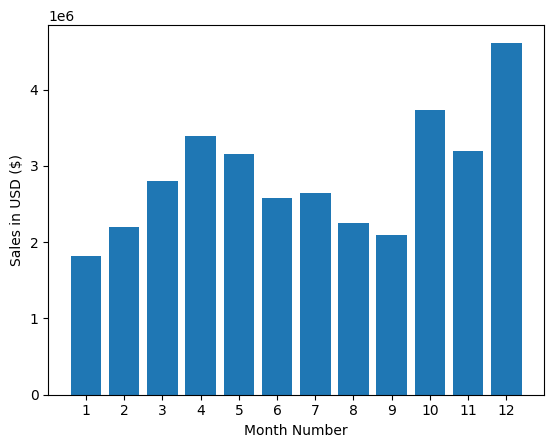

In [17]:
months = range(1, 13)
plt.bar(months, result.values)
plt.xlabel('Month Number')
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.show()


What city had the highest number of sales

In [18]:
results = all_data.groupby('City')[['Sales']].sum()
print(results)

                     Sales
City                      
Atlanta         2795498.58
Austin          1819581.75
Boston          3661642.01
Dallas          2767975.40
Los Angeles     5452570.80
New York City   4664317.43
Portland        2320490.61
San Francisco   8262203.91
Seattle         2747755.48


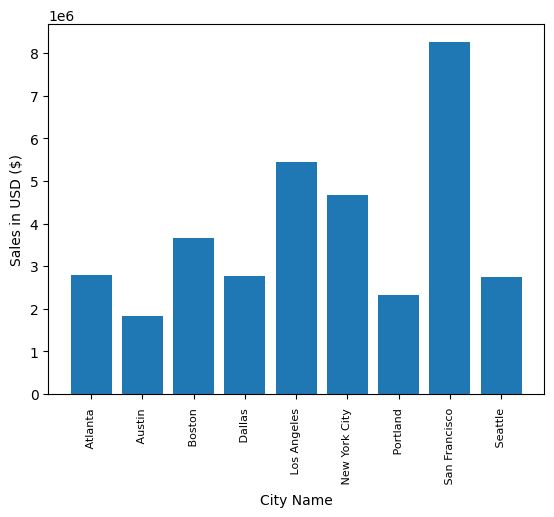

In [19]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation ='vertical', size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()

What time should we display advertisements to maximize likelihood of customers buying products?

In [20]:
#covert to date time
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99


In [21]:
# by Minute column and hour 
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute,Hour
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,46,8
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,30,22
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,38,14
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,38,14
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,27,9


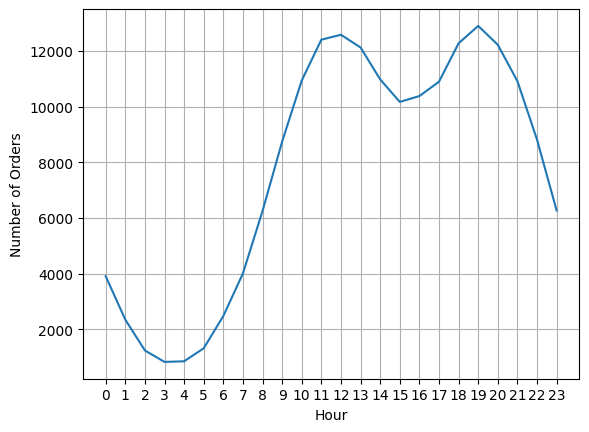

In [22]:
# Ensure 'all_data' is defined and contains the necessary columns
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.plot(hours, all_data.groupby('Hour')['Order ID'].count())

What products are most often sold together?

In [23]:
#Get duplicated orders ID's

df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(7)

C:\Users\Adio\AppData\Local\Temp\ipykernel_5708\2306758363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute,Hour,Grouped
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,38,14,"Google Phone,Wired Headphones"
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,38,14,"Google Phone,Wired Headphones"
17,17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,600.00,42,19,"Google Phone,USB-C Charging Cable"
18,18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,11.95,42,19,"Google Phone,USB-C Charging Cable"
29,29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,99.99,31,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
30,30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,99.99,31,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco,5.98,0,17,"AAA Batteries (4-pack),Google Phone"


In [24]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


What products sold the most? Why do you think it sold the most?

In [25]:
product_group = all_data.groupby('Product')[['Quantity Ordered']].sum()
product_group


,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


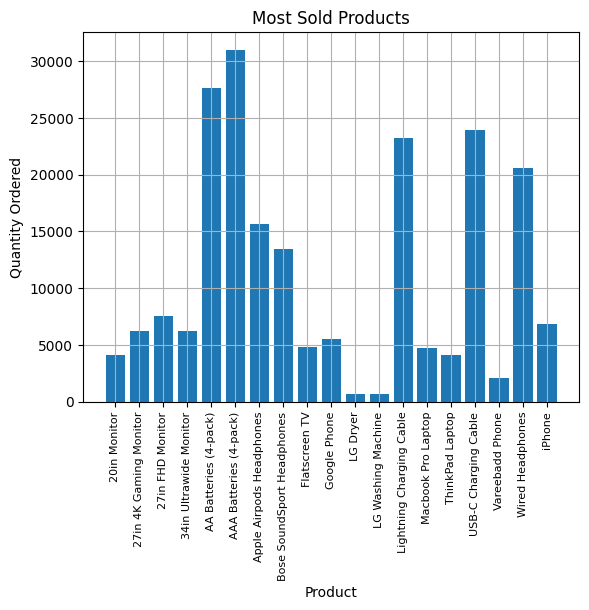

In [26]:
products = product_group.index.tolist()

plt.bar(products, product_group['Quantity Ordered'])
plt.title('Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation ='vertical', size=8)
plt.grid()
plt.show()

C:\Users\Adio\AppData\Local\Temp\ipykernel_5708\4183968911.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


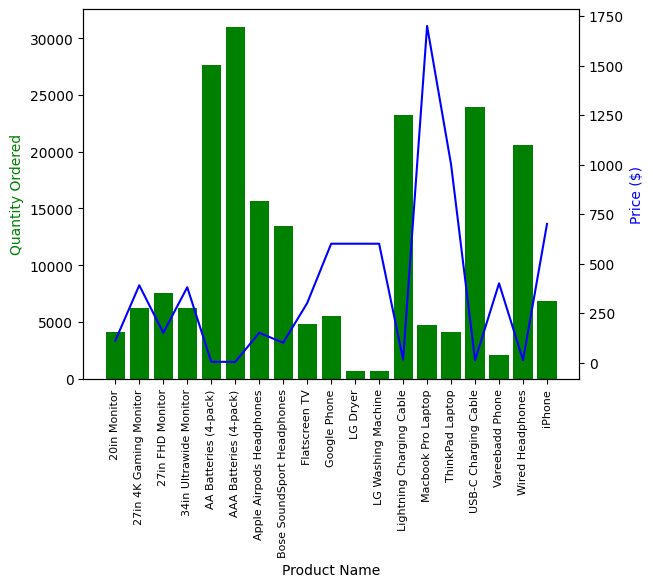

In [27]:
# Ensure 'Price Each' is numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Group by 'Product' and calculate the mean price
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_group['Quantity Ordered'], color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()